In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

filename = '/content/drive/MyDrive/confidenceintervals.py'
exec(open(filename).read())

filename = '/content/drive/MyDrive/loadwalks.py'
exec(open(filename).read())

path = '/content/drive/My Drive/CapstoneWalks/Y_Testing_Data.h5'
Y_Testing_Data = read_one_hdf5(path)

path = '/content/drive/My Drive/CapstoneWalks/X_Testing_Data.h5'
X_Testing_Data = read_one_hdf5(path)

path = '/content/drive/My Drive/CapstoneWalks/Y_Train_Data.h5'
Y_Train_Data = read_one_hdf5(path)

path = '/content/drive/My Drive/CapstoneWalks/X_Train_Data.h5'
X_Train_Data = read_one_hdf5(path)

Completed
Completed
Completed
Completed


[0.46976 0.3052  0.02625 0.1988  0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.     ]


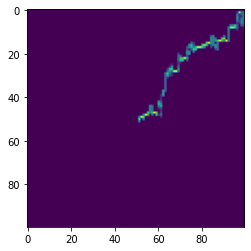

In [3]:
# n>59999 will produce a random walk
n = 60000
plt.imshow(X_Train_Data[n])
print(Y_Train_Data[n])

In [4]:
import tensorflow as tf
MultiTasker = tf.keras.models.Sequential()
MultiTasker.add(tf.keras.layers.Flatten())
MultiTasker.add(tf.keras.layers.Dense(128, activation = tf.nn.sigmoid))
MultiTasker.add(tf.keras.layers.Dense(128, activation = tf.nn.sigmoid))
MultiTasker.add(tf.keras.layers.Dense(128, activation = tf.nn.sigmoid))
MultiTasker.add(tf.keras.layers.Dense(14, activation = 'sigmoid'))

MultiTasker.compile(optimizer = 'adam', 
              loss = tf.keras.losses.LogCosh(), 
              metrics = ['mse'])

MultiTasker.fit(X_Train_Data, Y_Train_Data, epochs = 15, 
                    shuffle=True, validation_data=(X_Testing_Data, Y_Testing_Data))

Epoch 1/15
3750/3750 [==============================] - 15s 3ms/step - loss: 0.0136 - mse: 0.0297 - val_loss: 0.0027 - val_mse: 0.0057
Epoch 2/15
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0023 - mse: 0.0050 - val_loss: 0.0019 - val_mse: 0.0040
Epoch 3/15
3750/3750 [==============================] - 17s 5ms/step - loss: 0.0016 - mse: 0.0035 - val_loss: 0.0015 - val_mse: 0.0033
Epoch 4/15
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0013 - mse: 0.0027 - val_loss: 0.0014 - val_mse: 0.0029
Epoch 5/15
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0010 - mse: 0.0023 - val_loss: 0.0014 - val_mse: 0.0029
Epoch 6/15
3750/3750 [==============================] - 11s 3ms/step - loss: 8.9377e-04 - mse: 0.0019 - val_loss: 0.0012 - val_mse: 0.0025
Epoch 7/15
3750/3750 [==============================] - 11s 3ms/step - loss: 7.8132e-04 - mse: 0.0017 - val_loss: 0.0012 - val_mse: 0.0025
Epoch 8/15
3750/3750 [=========================

In [5]:
MultiTasker.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (32, 10000)               0         
_________________________________________________________________
dense_4 (Dense)              (32, 128)                 1280128   
_________________________________________________________________
dense_5 (Dense)              (32, 128)                 16512     
_________________________________________________________________
dense_6 (Dense)              (32, 128)                 16512     
_________________________________________________________________
dense_7 (Dense)              (32, 14)                  1806      
Total params: 1,314,958
Trainable params: 1,314,958
Non-trainable params: 0
_________________________________________________________________


In [6]:
predictions = MultiTasker.predict([X_Testing_Data])
predictions_clean = predictions.round(decimals = 3)


Consider rewriting this model with the Functional API.


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


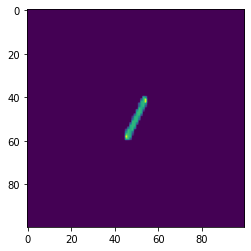

In [7]:
#Verify Correct Predictions
n = 6969
print(predictions_clean[n])
print(Y_Testing_Data[n])
plt.imshow(X_Testing_Data[n])

1.005401718180623


'our mean lies in the interval ]1.0048, 1.006['

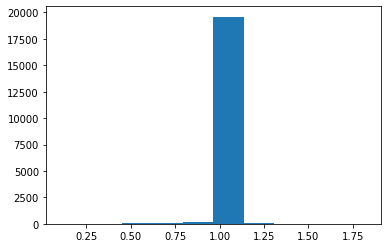

In [11]:
sums = [sum(array) for array in predictions]
plt.hist(sums)
print(sum(sums)/len(sums))
report_confidence_interval(confidence_interval(sums, confidence=0.95))

In [ ]:
#Calculate square error for each output node then sum outputs for single residual term
residuals = []
for i in range(len(predictions)):
  residuals.append(sum((Y_Testing_Data[i] - predictions[i])**2))

(array([19627.,    72.,    24.,    29.,    27.,    35.,    29.,    21.,
           33.,   103.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

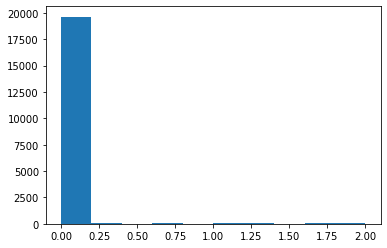

In [ ]:
plt.hist(residuals)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


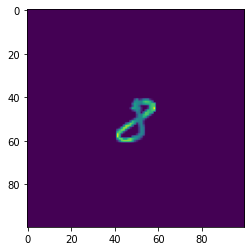

In [ ]:
#Find and show worst prediction
loc = residuals.index(max(residuals))   #save prediciton location in variable
plt.imshow(X_Testing_Data[loc])
print(Y_Testing_Data[loc])
print(predictions[loc])